# 4. Graph from Database Table Example

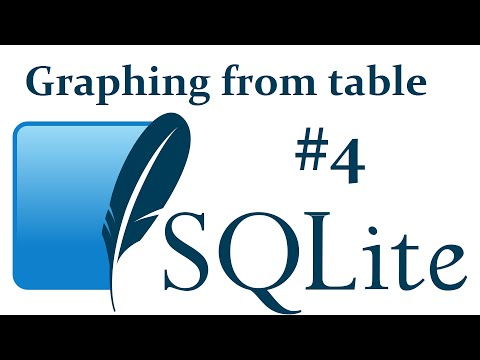

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('pq4nwICEB4U')

## 4.1 Existing code

In [2]:
import sqlite3
import time
import datetime
import random

# Connect to the database called 'tutorial.db'. If it does't exist, it will be created.
# If it does exist, it will NOT be overwritten or re-created.
conn = sqlite3.connect('tutorial.db')

# Get the cursor which can select/delete/add things and so on.
c = conn.cursor()

def create_table():
    # Create a table called stuffToPlot if it doesn't exist. This table contains the following columns: 
    # unix, datestamp, keyword, value.
    c.execute("CREATE TABLE IF NOT EXISTS stuffToPlot(unix REAL, datestamp TEXT, keyword TEXT, value REAL)")
    
def insert_data_entry():
    # The cursor executes an SQL query "INSERT INTO" to insert a tuple of values into the table 'stuffToPlot'.
    c.execute("INSERT INTO stuffToPlot VALUES(1452549219, '2016-01-11 13:53:39', 'Python', 6)")
    
    # Commit the SQL query "INSERT INTO" and save the change in the table. 
    conn.commit()
    
    # Comment out the closure code to improve the efficiency.
    # c.close()
    # conn.close()
    
def insert_dynamic_data_entry():
    unix = int(time.time())
    date = str(datetime.datetime.fromtimestamp(unix).strftime('%Y-%m-%d %H:%M:%S'))
    keyword = "Python"
    value = random.randrange(0, 10)
    
    # While SQLite uses "?" as the placeholder of the input variable, MySQL uses "%s".
    c.execute("INSERT INTO stuffToPlot (unix, datestamp, keyword, value) VALUES (?, ?, ?, ?)",
             (unix, date, keyword, value))
    
    conn.commit()
    
def read_all_from_db():
    # Select all the rows.
    c.execute("SELECT * from stuffToPlot")
    # Fetch all the selected rows.
    data = c.fetchall()
    
    for row in data:
        print(row)
        
def read_some_from_db():
    # Select the rows which satisfy the conditions.
    #c.execute("SELECT * from stuffToPlot WHERE value=3")
    #c.execute("SELECT * from stuffToPlot WHERE value=3 AND keyword='Python'")
    #c.execute("SELECT * from stuffToPlot WHERE unix>=1517301604")
    # Select some columns in the rows.
    c.execute("SELECT keyword, unix from stuffToPlot WHERE unix>=1517301604")
    
    # Fetch the selected rows.
    data = c.fetchall()
    
    for row in data:
        # Print the first element in the row. Note that the order of the elements 
        # in a row can be specified in the SELECT command, and thus may be different 
        # from the order of the columns in the table.
        #print(row[0])
        print(row)

## 4.2 Plot the graph

In [3]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python  %%python

In [4]:
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'wx', 'qt4', 'qt5', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'inline', 'ipympl', 'widget']


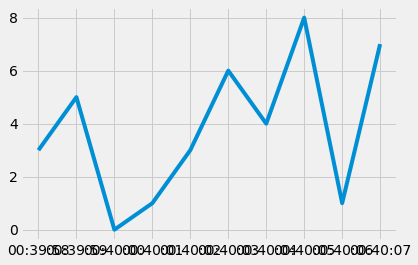

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from dateutil import parser
from matplotlib import style
style.use('fivethirtyeight')

def graph_data_datestamp():
    c.execute('SELECT datestamp, value FROM stuffToPlot')
    
    dates = []
    values = []
    for row in c.fetchall():
        dates.append(parser.parse(row[0]))
        values.append(row[1])
        
    plt.plot_date(dates, values, '-')
    plt.show()
    
graph_data_datestamp()

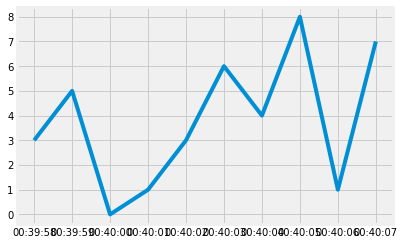

In [6]:
def graph_data_unix():
    c.execute('SELECT unix, value FROM stuffToPlot')
    
    dates = []
    values = []
    for row in c.fetchall():
        # Conver the conventional time stamp into a UNIX time stamp.
        dates.append(datetime.datetime.fromtimestamp(row[0]))
        values.append(row[1])
        
    plt.plot_date(dates, values, '-')
    plt.show()
    
graph_data_unix()

In [7]:
c.close()
conn.close()